In [2]:
import matplotlib.pyplot as plt
import math

In [4]:
sim_time_end = 50
time = [z for z in range(sim_time_end)]
def step(time,period,hi_val,low_val):
    if (time%period)==0:
        step.pol=not step.pol
    if step.pol:
        return hi_val
    else:
        return low_val
step.pol=True

def clip(n,min,max) :
    if n<min:
        n=min
    if n>max:
        n=max
    return n    

def do_budget_calc(last_input,budget,input,tau,time_delta):
    delta = input-last_input[0]
    last_input[0] = input
    take_from_budget = budget[0]*math.exp(-tau/time_delta)
    budget[0] = budget[0] -take_from_budget + delta
    out = input-budget[0]
    return out
    

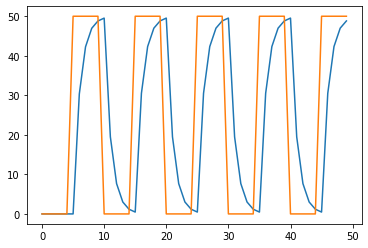

In [9]:
input = [step(t,5,50,00) for t in time]
b = [0]
l = [0]
output = [do_budget_calc(l,b,t,1,2) for t in input]
plt.plot(time, output)
plt.plot(time, input)

In [29]:
def pid(dt,setpoint,measured,Kp,Ki,Kd) :
    error = setpoint - measured
    proportional = error
    pid.integral = pid.integral + error * dt
    derivative = (error - pid.previous_error) / dt
    output = clip(Kp * proportional + Ki * pid.integral + Kd * derivative,0,100)
    pid.previous_error = error
    return output
pid.integral =0 
pid.previous_error =0 

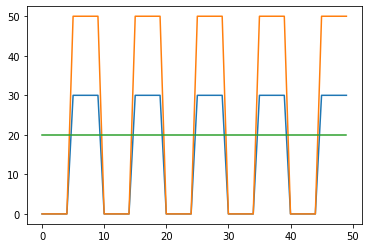

In [34]:
input = [step(t,5,50,00) for t in time]
measured = [20 for t in time]
output = [pid(1,item,measured[index],1,0,0)  for index,item in enumerate(input)]
plt.plot(time, output)
plt.plot(time, input)
plt.plot(time, measured)